# Машинное обучение, ВМК МГУ

# Практическое задание 3

### Общая информация

Дата выдачи: 2 ноября 2020

Мягкий дедлайн: 01:00MSK 16 ноября 2020 (за каждый день просрочки снимается 1 балл, отсчет дней ведите от 01:00 2 ноября)

Жесткий дедлайн: 01:00MSK 23 ноября 2020.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-3-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-3-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** ...

**Напоминание:**
    
* Все ваши графики должны быть **"красивыми"** --- подробнее о том, как их оформлять, можно найти в первом практическом задании. При несоответствии какиму-то из критериев вам могут снять баллы.
* Пишите в текстовых ячейках/print в коде ответы на **все вопросы из заданий/просьбы сделать выводы** --- при их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и поэтому будем снижать баллы

In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import seaborn as sns

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [3]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов (веса, они же составляют вектор w) близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями? 

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

Для начала просто запустим регрессию с параметрами по умолчанию и посмотрим, что у нас получится.

In [4]:
from sklearn.linear_model import Lasso, Ridge

In [5]:
l1_clf = Lasso()
l1_clf.fit(X_train, y_train)
l1_clf.coef_

array([  0.        ,   0.        , 274.32681397,  48.58596734,
         0.        ,   0.        ,  -0.        ,   0.        ,
       424.11801795,   0.        ])

In [6]:
l2_clf = Ridge()
l2_clf.fit(X_train, y_train)
l2_clf.coef_

array([  20.86524598,  -58.00074047,  231.26919104,  186.6748608 ,
         33.3106947 ,   -2.16998131, -150.95053633,  141.35047981,
        250.75403183,  123.1796716 ])

В случае Lasso зануляется довольно много коэффициентов, в то время как у Ridge только один коэффициент на мой взгляд близок к нулю. Выполним перебор по логарифмической сетке.

In [7]:
k = np.arange(-3, 4, 0.1)
l1_coef_list = np.zeros(len(k))
j = 0

for i in k:
    l1_clf = Lasso(alpha=10**i)
    l1_clf.fit(X_train, y_train)
    l1_coef_list[j] = numpy.count_nonzero(l1_clf.coef_)
    j += 1

In [8]:
l2_coef_list = np.zeros(len(k))
j = 0

for i in k:
    l2_clf = Ridge(alpha=10**i)
    l2_clf.fit(X_train, y_train)
    l2_coef_list[j] = np.sum(np.abs(l2_clf.coef_) >= 1)
    j += 1

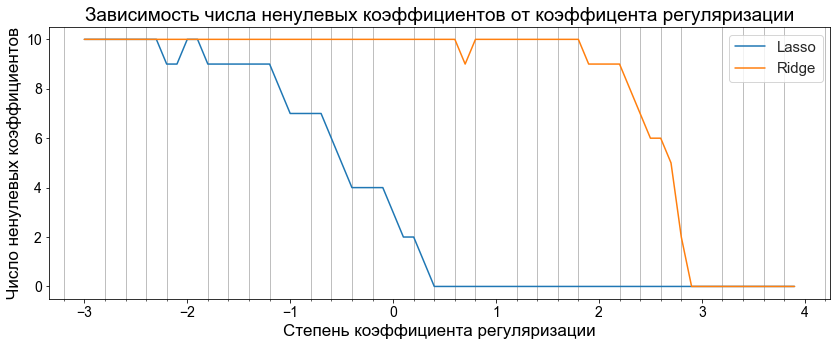

In [9]:
fig = plt.figure(figsize= (14,5))
ax1 = fig.add_subplot(111)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title("Зависимость числа ненулевых коэффициентов от коэффицента регуляризации", fontsize = 19)
plt.xlabel("Степень коэффициента регуляризации", fontsize = 17) 
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
plt.grid(which='minor')
plt.ylabel("Число ненулевых коэффициентов", fontsize = 17) 
sns.set_style("whitegrid", {'axes.axisbelow': False, 'axes.grid': True})
sns.set_palette('bright')
ax1.plot(k, l1_coef_list, label = "Lasso")
ax1.plot(k, l2_coef_list, label = "Ridge")
ax1.legend(fontsize = 15)

Результаты согласуются с моими ожиданиями, т.к. из теории известно, что с увеличением значения гиперпараметра сложность модели уменьшается, что мы и можем наблюдать на графике. При этом известно, что Lasso может выбирать объекты, а Ridge при этом только уменьшает коэффициенты, близкие к нулю, задавая оба признака с равными весами, но не сводит их к нулю. Поэтому график Lasso убывает быстрее.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
l2_clf = Ridge()
l2_clf.fit(X_train, y_train)
y_pred = l2_clf.predict(X_test)

print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE = ", mean_absolute_error(y_test, y_pred))
print("R^2 = ", r2_score(y_test, y_pred))

RMSE =  58.304415127748044
MAE =  49.602846072753
R^2 =  0.3598993868368464


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости функции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

In [11]:
k = np.arange(-3, 4, 1, dtype=float)
k = 10 ** k
metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
parameters = {'alpha': k}
ylabel = ['RMSE', 'MAE', 'R^2']

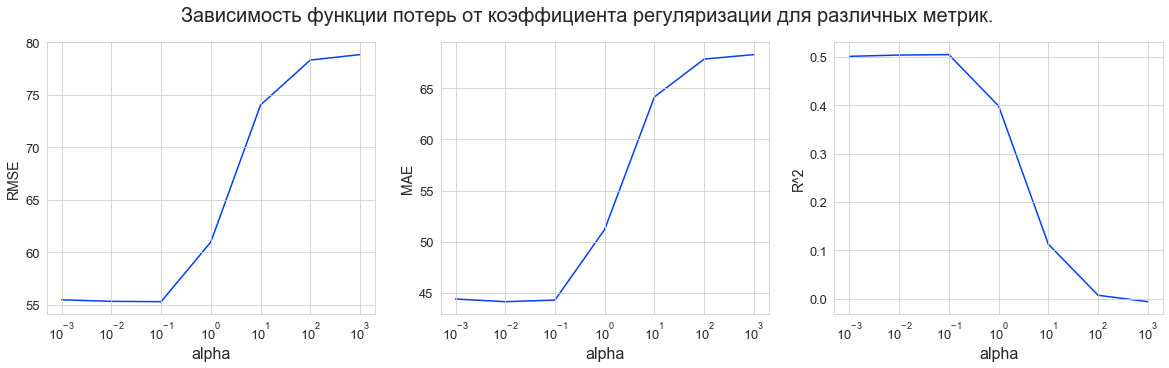

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Зависимость функции потерь от коэффициента регуляризации для различных метрик.", fontsize=20)

best_params = []
for i, m in enumerate(metrics):
    clf = GridSearchCV(Ridge(), parameters, scoring=m, cv=3, refit=True)
    clf.fit(X_train, y_train)
    best_params.append(clf.best_estimator_)
    if m == 'neg_mean_squared_error':
        ax[i].plot(parameters['alpha'], np.sqrt(-clf.cv_results_['mean_test_score']))
    else:
        ax[i].plot(parameters['alpha'], (1 - 2 * (m != 'r2')) * clf.cv_results_['mean_test_score'])
    ax[i].set_xscale('log')
    ax[i].set_xlabel('alpha', fontsize=16)
    ax[i].set_ylabel(ylabel[i], fontsize=14)
    for label in (ax[i].get_xticklabels() + ax[i].get_yticklabels()):
        label.set_fontsize(13)

In [47]:
print("RMSE = ", np.sqrt(mean_squared_error(y_test, best_params[0].predict(X_test))), ", alpha = ", best_params[0].alpha)
print("MAE = ", mean_absolute_error(y_test, best_params[1].predict(X_test)), ", alpha = ", best_params[1].alpha)
print("R^2 = ", r2_score(y_test, best_params[2].predict(X_test)), ", alpha = ", best_params[2].alpha)

RMSE =  55.641981911273604 , alpha =  0.1
MAE =  47.02403597922626 , alpha =  0.01
R^2 =  0.41702418482173653 , alpha =  0.1


Качество улучшилось, но не то чтобы очень сильно. Значит, выбросы не сильно влияют на модель.

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [48]:
l2_clf = Ridge()
predicted = cross_val_predict(l2_clf, X_train, y_train, cv=10)

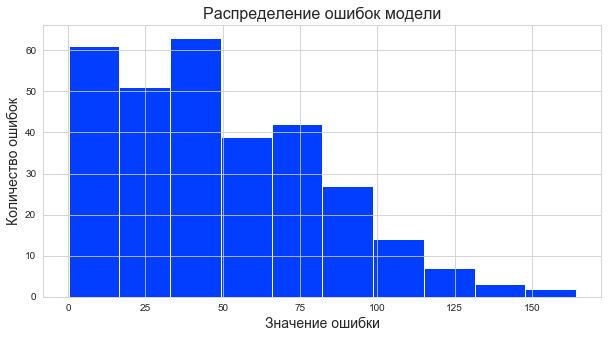

In [49]:
fig = plt.figure(figsize=(10, 5))
n, bin, patches = plt.hist(np.absolute(y_train - predicted))
plt.title('Распределение ошибок модели', fontsize=16)
plt.ylabel('Количество ошибок', fontsize=14)
plt.xlabel('Значение ошибки', fontsize=14)
plt.show()

Мы видим, что основные значения ошибок сконцентрированы между 0 и 110. Поэтому можем считать выбросами все значения, где разброс больше 110.

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [50]:
X_train = X_train[np.absolute(y_train - predicted) < 110]
y_train = y_train[np.absolute(y_train - predicted) < 110]

In [53]:
l2_clf = Ridge(alpha=0.1)
l2_clf.fit(X_train, y_train)
y_pred = l2_clf.predict(X_test)

print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE = ", mean_absolute_error(y_test, y_pred))
print("R^2 = ", r2_score(y_test, y_pred))

RMSE =  57.37146963509635
MAE =  48.79310060965674
R^2 =  0.3802203579130471


**Ответ:** Стало лучше, но совсем незначительно. Это связано, во первых, с выбросами в тестовых данных, которые мы не можем проконтролировать. А во-вторых с довольно большим разбросом предсказаний.

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [10]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [11]:
clf = LinearSVC(max_iter=100000)
clf = clf.fit(X_train, y_train)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [12]:
y_pred = clf.decision_function(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC_AUC = ", roc_auc)

ROC_AUC =  0.9258628975378845


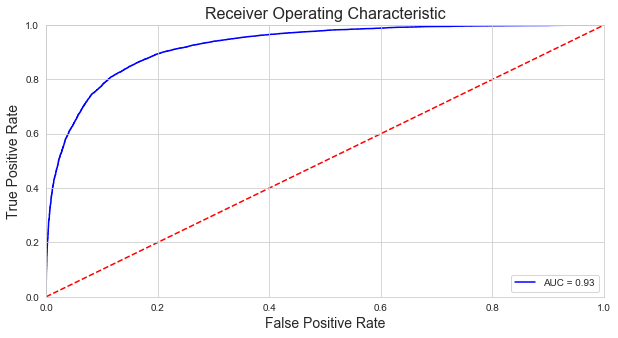

In [13]:
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

In [14]:
average_precision = metrics.average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.92


Text(0.5, 1.0, 'Average precision score: AP=0.92')

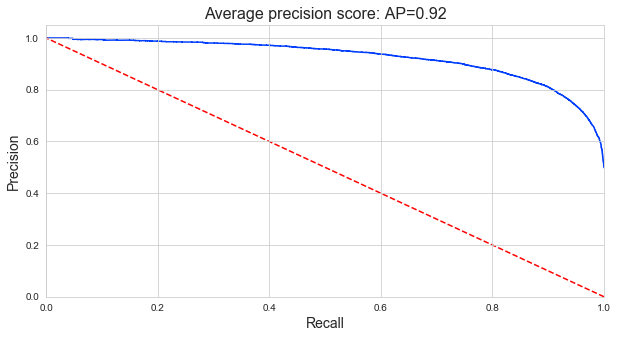

In [15]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(10, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.plot([1, 0], [0, 1],'r--')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score: AP={0:0.2f}'.format(average_precision), fontsize=16)

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [19]:
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [20]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_support = y_train[clf.support_]

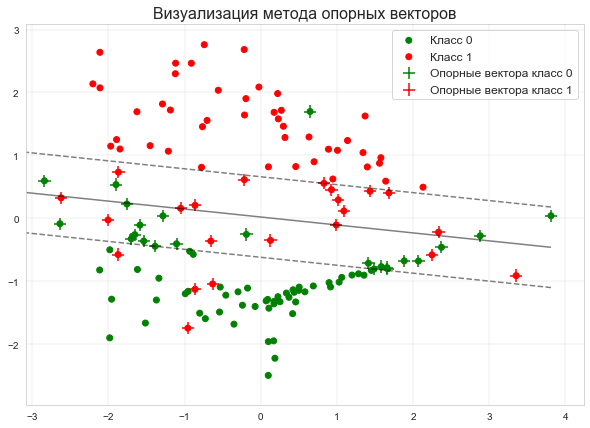

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))
d = {0:'green', 1:'red'}
labels = ['Класс 0', 'Класс 1', 'Опорные вектора класс 0', 'Опорные вектора класс 1']
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

for i in range(2):
    ax.scatter(X_train[y_train == i][:,0], X_train[y_train == i][:,1], 
               c=[d[y] for y in y_train[y_train == i]], label=labels[i])

for i in range(2, 4):
    ax.scatter(clf.support_vectors_[y_support == (i - 2)][:,0], clf.support_vectors_[y_support == (i - 2)][:,1], 
               c=[d[y] for y in y_support[y_support == (i - 2)]], marker = '+', s = 150, label=labels[i])

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

ax.legend(fontsize=12)
plt.title('Визуализация метода опорных векторов',fontsize=16)
plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

!!! я немножко изменила функцию, чтобы можно было построить обе кривые на одном графике: добавила label.

In [467]:
def plot_calibration_curve(y_test, preds, lbl='None'):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.ylim([0.0, 1.0])
    plt.xlim([1.0 / (2 * n_bins), 1.0 - 1.0 / (2 * n_bins)])
    plt.plot(bin_middle_points, bin_real_ratios, label=lbl)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [468]:
X, y = make_classification(
    n_samples=100000, n_features=2, n_informative=2, n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [469]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_y_pred = log_clf.predict(X_test)
log_p_pred = log_clf.predict_proba(X_test)

In [470]:
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)
svm_p_pred = svm_clf.predict_proba(X_test)

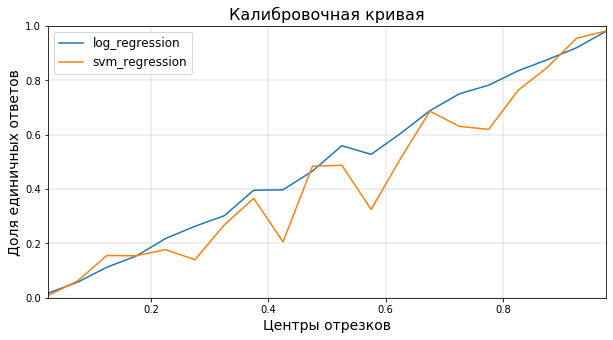

In [472]:
plt.figure(figsize=(10, 5))
plt.xlabel('Центры отрезков', fontsize=14)
plt.ylabel('Доля единичных ответов', fontsize=14)
plt.title('Калибровочная кривая', fontsize=16)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)
plot_calibration_curve(y_test, log_p_pred[:, 1], lbl='log_regression')
plot_calibration_curve(y_test, svm_p_pred[:, 1], lbl='svm_regression')
plt.legend(fontsize=12)

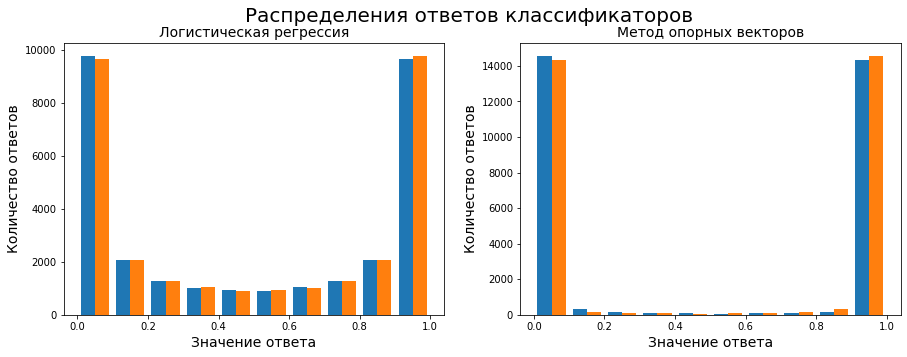

In [473]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Распределения ответов классификаторов", fontsize=20)

n, bin, patches = ax[0].hist(log_p_pred)
ax[0].set_title('Логистическая регрессия', fontsize=14)
ax[0].set_ylabel('Количество ответов', fontsize=14)
ax[0].set_xlabel('Значение ответа', fontsize=14)
n, bin, patches = ax[1].hist(svm_p_pred)
ax[1].set_title('Метод опорных векторов', fontsize=14)
ax[1].set_ylabel('Количество ответов', fontsize=14)
ax[1].set_xlabel('Значение ответа', fontsize=14)
plt.show()

Можно заметить, что логистическая регрессия более сглаженно распределяет ответы. У SVM более резкое и четкое распределение. Возможно, именно этим объясняется то, что его калибровочная кривая отличается от диагональной.

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [7]:
calibrated_log = CalibratedClassifierCV(log_clf)
calibrated_log.fit(X_train, y_train)
cal_log_y_pred = calibrated_log.predict(X_test)
cal_log_p_pred = calibrated_log.predict_proba(X_test)[:, 1]

In [8]:
svm_clf = LinearSVC(max_iter=100000)

In [9]:
calibrated_svc = CalibratedClassifierCV(svm_clf)
calibrated_svc.fit(X_train, y_train)
calibrated_svm_y_pred = calibrated_svc.predict(X_test)
calibrated_svm_p_pred = calibrated_svc.predict_proba(X_test)[:, 1]

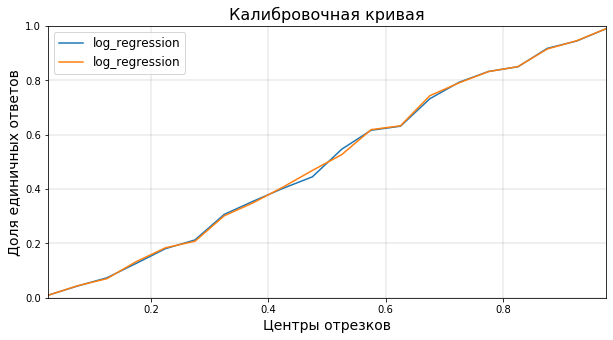

In [11]:
plt.figure(figsize=(10, 5))
plt.xlabel('Центры отрезков', fontsize=14)
plt.ylabel('Доля единичных ответов', fontsize=14)
plt.title('Калибровочная кривая', fontsize=16)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)
plot_calibration_curve(y_test, cal_log_p_pred, lbl='log_regression')
plot_calibration_curve(y_test, calibrated_svm_p_pred, lbl='log_regression')
plt.legend(fontsize=12)

Да, это действительно помогло и калибровочная кривая для метода опорных векторов приблизилась к диагональной.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [2]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [3]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [4]:
log_regression = LogisticRegression(solver='liblinear', max_iter=10000)
log_regression.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [29]:
y_pred = log_regression.predict(X_test)

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

In [30]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
average_precision = metrics.average_precision_score(y_test, y_pred)
print('ROC-AUC = {0:0.2f}'.format(roc_auc))
print('Average precision-recall score = {0:0.2f}'.format(average_precision))

ROC-AUC = 0.59
Average precision-recall score = 0.55


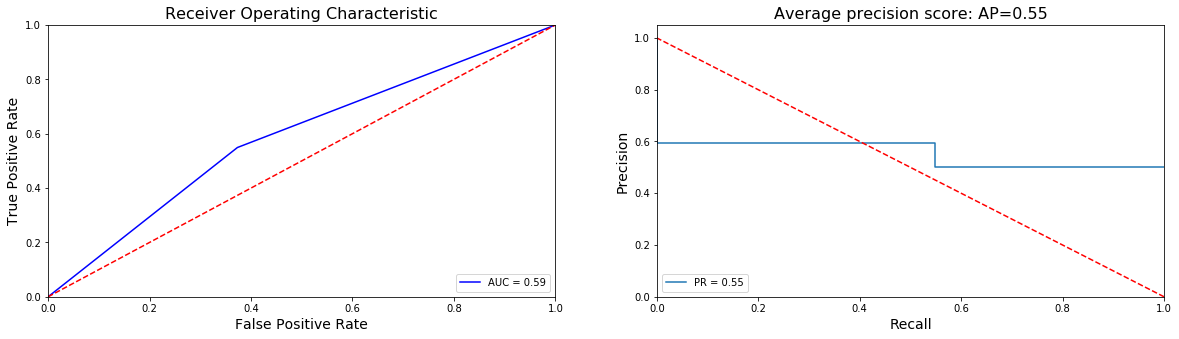

In [31]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].set_title('Receiver Operating Characteristic', fontsize=16)
ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax[0].legend(loc = 'lower right')
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('True Positive Rate', fontsize=14)
ax[0].set_xlabel('False Positive Rate', fontsize=14)

ax[1].step(recall, precision, where='post', label = 'PR = %0.2f' % average_precision)
ax[1].legend(loc = 'lower left')
ax[1].set_xlabel('Recall', fontsize=14)
ax[1].set_ylabel('Precision', fontsize=14)
ax[1].plot([1, 0], [0, 1],'r--')
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlim([0.0, 1.0])
ax[1].set_title('Average precision score: AP={0:0.2f}'.format(average_precision), fontsize=16)
plt.show()

**Ответ:** по построенным кривым можно заметить, что наш классификатор близок к случайному угадыванию, что не есть хорошо. PR-кривая позволяет избавиться от проблемы несбалансированности классов: площадь PR-кривой зависит от объёма выборки при разной пропорции классов. Это значение также близко к случайному угадыванию. Значит, у классификатора плохое качество.

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [57]:
alpha_values = np.logspace(-2, 1, num=4)

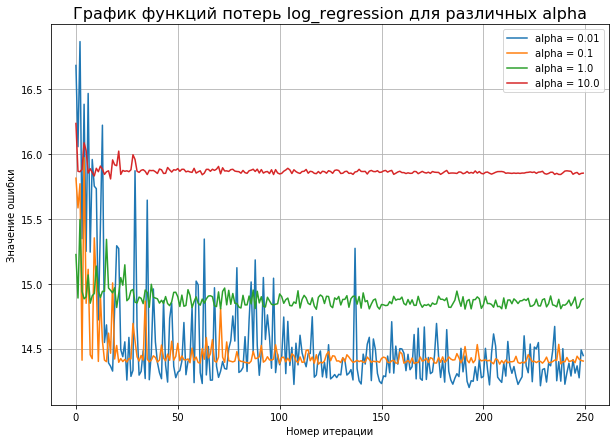

In [60]:
plt.figure(figsize=(10, 7))
for a in alpha_values:
    log_clf = SGDClassifier(alpha=a, loss='log')
    predict = []
    for i in range(250):
        log_clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
        y_pred = log_clf.predict(X_test)
        predict.append(metrics.log_loss(y_test, y_pred))
    plt.plot(np.arange(250), predict, label='alpha = {}'.format(a))
plt.title('График функций потерь log_regression для различных alpha',fontsize=16)
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки')
plt.grid()
plt.legend()
plt.show()

Мы можем наблюдать, что при большем значении коэфициента регуляризации функция потерь сходится быстрее. Так, для 0.01 наблюдаются довольно большие скачки значения ошибки. Для коэффициента, равного 10, скачки почти незаметны, но при этом он значение ошибки остается довольно высоким. Если бы я выбирала коэффициент регуляризации, я бы выбрала либо 0.1, либо 1.

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [478]:
log_regression = LogisticRegression(max_iter=10000)
log_regression.fit(X_train, y_train)
p_pred = log_regression.predict_proba(X_test)

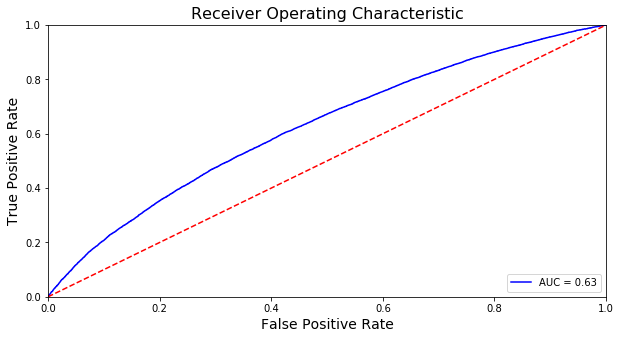

In [479]:
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

In [480]:
roc_auc

0.6250862514012421

__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [6]:
categorical = data.columns[data.columns.str.contains('_cat')]

In [25]:
enc = OneHotEncoder()
X_categor_train = enc.fit_transform(X_train[categorical]).toarray()
X_categor_test = enc.transform(X_test[categorical]).toarray()

In [9]:
encode_X_train = X_train.drop(columns=categorical)
encode_X_test = X_test.drop(columns=categorical)

In [27]:
encode_X_train = np.hstack((encode_X_train.to_numpy(), X_categor_train))
encode_X_test = np.hstack((encode_X_test.to_numpy(), X_categor_test))

In [28]:
%%timeit

log_regression = LogisticRegression(max_iter=10000)
log_regression.fit(encode_X_train, y_train)
p_pred = log_regression.predict_proba(encode_X_test)

48.2 s ± 1.62 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


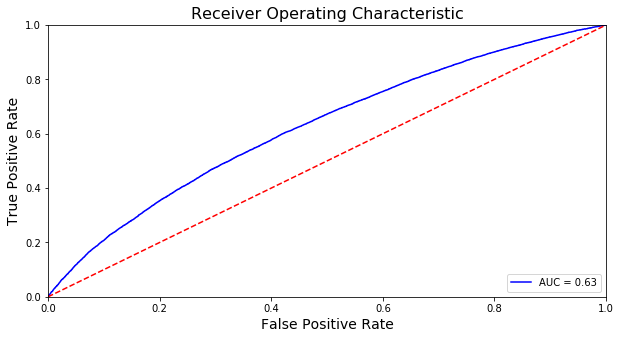

In [29]:
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

In [30]:
roc_auc

0.6250862514012421

Сначала кажется, что ничего не изменилось, но нет! Вам не кажется. Судя по всему, это из-за того,  что в этом случае довольно сложно повысить точность. При этом у нас существенно расширилось признаковое пространство, и поэтому увеличилось время вычислений.

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [34]:
def counters(x_train, y, x_test=[], test=False):
    x_train = x_train.to_numpy()
    if test:
        x_test = x_test.to_numpy()
        size = x_test.shape
        mask = x_test[: 1000, None] == x_train
        counts = np.sum(mask, axis=1)
        successes = counts * y[:1000, np.newaxis]
        for i in range(1000, size[0], 1000):
            mask = x_test[i: min(i + 1000, size[0]), None] == x_train
            help_counts = np.sum(mask, axis=1)
            counts = np.append(counts, help_counts, axis=0)
            successes = np.append(successes, help_counts * y[i : min(i + 1000, size[0]), np.newaxis], axis=0)
        p = successes / counts
        board = abs(np.min(p)) / 100
        p += np.random.uniform(low=-board, high=board, size=p.shape)
        return p
    else:
        size = x_train.shape
        mask = x_train[: 1000, None] == x_train
        counts = np.sum(mask, axis=1)
        successes = counts * y[:1000, np.newaxis]
        for i in range(1000, size[0], 1000):
            mask = x_train[i: min(i + 1000, size[0]), None] == x_train
            help_counts = np.sum(mask, axis=1)
            counts = np.append(counts, help_counts, axis=0)
            successes = np.append(successes, help_counts * y[i : min(i + 1000, size[0]), np.newaxis], axis=0)
        p = successes / counts
        board = abs(np.min(p)) / 100
        p += np.random.uniform(low=-board, high=board, size=p.shape)
        return p

In [35]:
X_train_count = counters(X_train[categorical], y_train)

In [36]:
X_test_count = counters(X_train[categorical], y_train, X_test[categorical], test=True)

In [37]:
count_X_train = np.hstack((encode_X_train.to_numpy(), X_train_count))
count_X_test = np.hstack((encode_X_test.to_numpy(), X_test_count))

In [38]:
log_regression = LogisticRegression(max_iter=10000)
log_regression.fit(count_X_train, y_train)
p_pred = log_regression.predict_proba(count_X_test)

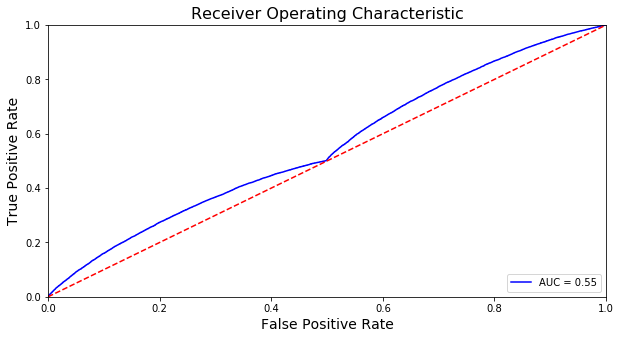

In [39]:
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

In [40]:
roc_auc

0.5522417511522812

**Ответ:** Качество предсказания лучше, чем у случайного классификатора, но хуже, чем при one-hot энкодировании. Думаю, это из-за неудачного способа добавлять шум к данным. Если вы это будете проверять, можете, пожалуйста, прокомментировать, как лучше было это сделать?
Чтобы закодировать признаки таким способом, требуется достаточно большое количество времени. В целом, этот способ хорош, если каким-то образом улучшить функцию, которую я написала, и добавлять шум более удачно.

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [22]:
def counters(x_train, y, x_test=[], C=10, test=False):
    x_train = x_train.to_numpy()
    if test:
        x_test = x_test.to_numpy()
        size = x_test.shape
        mask = x_test[: 1000, None] == x_train
        counts = np.sum(mask, axis=1)
        successes = counts * y[:1000, np.newaxis]
        for i in range(1000, size[0], 1000):
            mask = x_test[i: min(i + 1000, size[0]), None] == x_train
            help_counts = np.sum(mask, axis=1)
            counts = np.append(counts, help_counts, axis=0)
            successes = np.append(successes, help_counts * y[i : min(i + 1000, size[0]), np.newaxis], axis=0)
        p = (successes + C * np.mean(y)) / (counts + C)
        return p
    else:
        size = x_train.shape
        mask = x_train[: 1000, None] == x_train
        counts = np.sum(mask, axis=1)
        successes = counts * y[:1000, np.newaxis]
        for i in range(1000, size[0], 1000):
            mask = x_train[i: min(i + 1000, size[0]), None] == x_train
            help_counts = np.sum(mask, axis=1)
            counts = np.append(counts, help_counts, axis=0)
            successes = np.append(successes, help_counts * y[i : min(i + 1000, size[0]), np.newaxis], axis=0)
        p = (successes + C * np.mean(y)) / (counts + C)
        return p

In [27]:
X_train_count = counters(X_train[categorical], y_train)
X_test_count = counters(X_train[categorical], y_train, X_test[categorical], C=10, test=True)

In [28]:
count_X_train = np.hstack((encode_X_train.to_numpy(), X_train_count))
count_X_test = np.hstack((encode_X_test.to_numpy(), X_test_count))

In [29]:
log_regression = LogisticRegression(max_iter=10000)
log_regression.fit(count_X_train, y_train)
p_pred = log_regression.predict_proba(count_X_test)

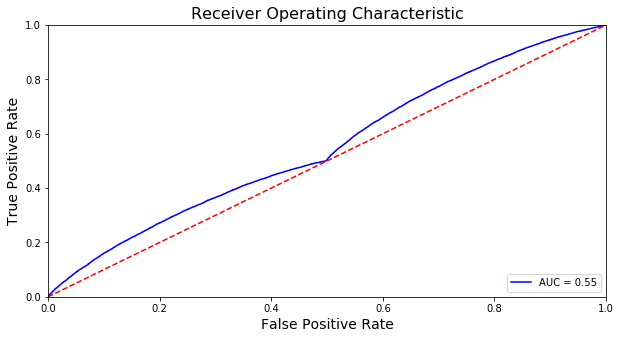

In [30]:
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

In [31]:
roc_auc

0.5521858823514767

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ:** Главный минус счетчиков: по сравнению с one-hot кодированием само кодирование признаков занимает много времени. Скорее всего, это связано с неоптимальностью моей реализации. С другой стороны, при использовании счетчиков у нас не получается расширения признакового пространства, и это плюс, т.к. модель считается значительно быстрее.

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [44]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [45]:
categorical = data.columns[data.columns.str.contains('_cat')]

enc = OneHotEncoder()
X_categor_train = enc.fit_transform(X_train[categorical]).toarray()
X_categor_test = enc.transform(X_test[categorical]).toarray()

encode_X_train = X_train.drop(columns=categorical)
encode_X_test = X_test.drop(columns=categorical)

encode_X_train = np.hstack((encode_X_train.to_numpy(), X_categor_train))
encode_X_test = np.hstack((encode_X_test.to_numpy(), X_categor_test))

print("Count of features: ", encode_X_train.shape[1])

Count of features:  227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [359]:
log_regression = LogisticRegression(max_iter=10000)
log_regression.fit(encode_X_train, y_train)
p_pred = log_regression.predict_proba(encode_X_test)

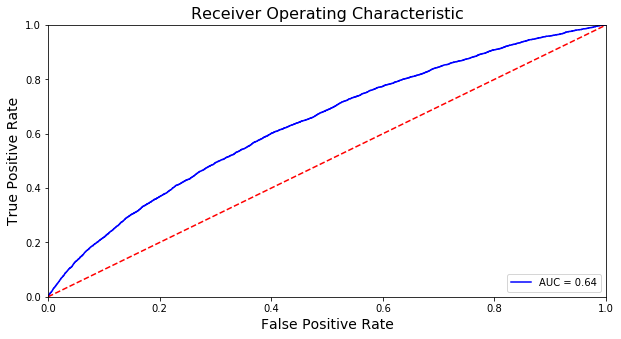

In [360]:
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

In [361]:
roc_auc

0.6380455824423934

### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отбора признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответствующего параметра линейной модели. Обучите модель заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [492]:
%%timeit

log_regression = LogisticRegression(max_iter=10000)
log_regression.fit(encode_X_train, y_train)
indices = np.argsort(np.abs(log_regression.coef_))[::-1][:,:200]

2min 39s ± 554 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [355]:
new_x_train = encode_X_train[:, indices[0]]
new_x_test = encode_X_test[:, indices[0]]

In [362]:
log_regression = LogisticRegression(max_iter=10000).fit(new_x_train, y_train)
p_pred = log_regression.predict_proba(new_x_test)

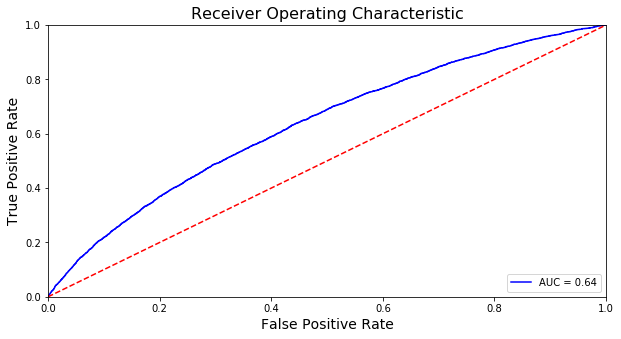

In [363]:
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

In [364]:
roc_auc

0.6354880661957494

Почему-то качество предсказания ухудшилось.

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [367]:
scaler = MinMaxScaler()
norm_x_train = scaler.fit_transform(encode_X_train)
norm_x_test = scaler.transform(encode_X_test)

In [368]:
log_regression = LogisticRegression(max_iter=10000)
log_regression.fit(norm_x_train, y_train)
indices = np.argsort(np.abs(log_regression.coef_))[::-1][:,:200]

In [369]:
new_x_train = norm_x_train[:, indices[0]]
new_x_test = norm_x_test[:, indices[0]]

In [370]:
log_regression = LogisticRegression(max_iter=10000).fit(new_x_train, y_train)
p_pred = log_regression.predict_proba(new_x_test)

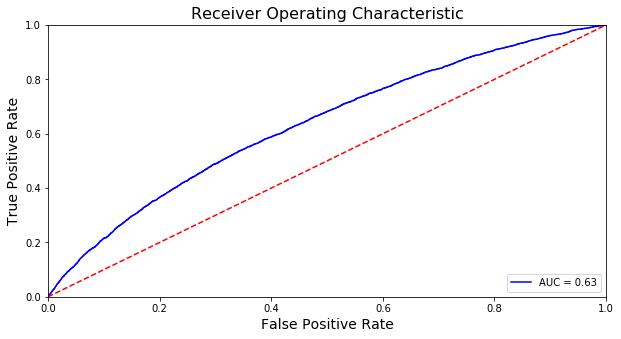

In [371]:
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

In [372]:
roc_auc

0.6337150934292601

Качество опять ухудшилось!

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [493]:
%%timeit

X_zero = encode_X_train[y_train == 0]
X_one = encode_X_train[y_train == 1]

mean_zero = np.mean(X_zero, axis=0)
mean_one = np.mean(X_one, axis=0)
std_zero = np.mean(X_zero, axis=0)
std_one = np.mean(X_one, axis=0)

n_zero = X_zero.shape[0]
n_one = X_one.shape[0]

t = np.abs(mean_one - mean_zero) / np.sqrt((n_one * (std_one ** 2) + n_zero * (std_zero ** 2)) / (n_one + n_zero))
indices = np.argsort(t)[::-1][:200]

705 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [395]:
new_x_train = encode_X_train[:, indices]
new_x_test = encode_X_test[:, indices]

In [397]:
log_regression = LogisticRegression(max_iter=10000).fit(new_x_train, y_train)
p_pred = log_regression.predict_proba(new_x_test)

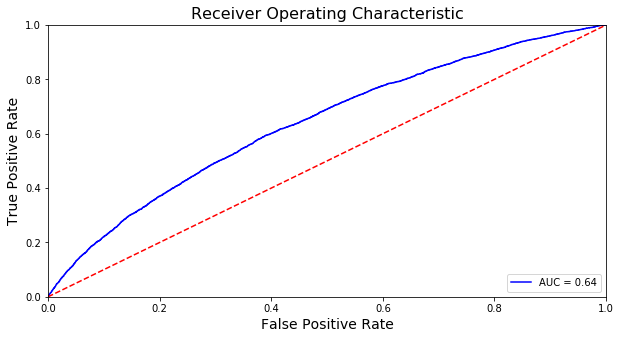

In [398]:
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

In [399]:
roc_auc

0.6386454245746762

Качество предсказания улучшилось! К тому же, этот способ значительно быстрее других. 

### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлемо. 

Если это всё ещё долго для вашего компьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [46]:
encode_X_train.shape

(476169, 227)

In [52]:
our_x_train = encode_X_train[:300000]
our_x_test = encode_X_train[300000:]
our_y_train = y_train[:300000]
our_y_test = y_train[300000:]

In [49]:
new_x_train = np.delete(our_x_train, 0, axis=1)
new_x_test = np.delete(our_x_test, 0, axis=1)
log_regression = LogisticRegression(max_iter=10000).fit(new_x_train, y_train[:300000])
p_pred = log_regression.predict_proba(new_x_test)
score = metrics.roc_auc_score(y_train[300000:], p_pred[:, 1])

На то, чтобы выполнить эту ячейку, ушло три минуты.

In [68]:
train_data = np.copy(our_x_train[:10000])
test_data = np.copy(our_x_test[:10000])

In [69]:
bad_index = 0
bad_score = 1

features = np.arange(227)
np.random.shuffle(features)
for i in range(features.shape[0] // 5):
    new_x_train = np.delete(train_data, features[i * 5 : min((i + 1) * 5, 227)], axis=1)
    new_x_test = np.delete(test_data, features[i * 5 : min((i + 1) * 5, 227)], axis=1)
    log_regression = LogisticRegression(max_iter=10000).fit(new_x_train, our_y_train[:10000])
    p_pred = log_regression.predict_proba(new_x_test)
    score = metrics.roc_auc_score(our_y_test[:10000], p_pred[:, 1])
    if score < bad_score:
        bad_index = np.arange(i * 5, min((i + 1) * 5, 227))

In [70]:
deleted_features = features[bad_index]
features = np.delete(features, bad_index)

In [71]:
bad_index = 0
bad_score = 1

np.random.shuffle(features)
for i in range(features.shape[0] // 5):
    deleted = np.hstack((deleted_features, features[i * 5 : min((i + 1) * 5, 222)]))
    new_x_train = np.delete(train_data, deleted, axis=1)
    new_x_test = np.delete(test_data, deleted, axis=1)
    log_regression = LogisticRegression(max_iter=10000).fit(new_x_train, our_y_train[:10000])
    p_pred = log_regression.predict_proba(new_x_test)
    score = metrics.roc_auc_score(our_y_test[:10000], p_pred[:, 1])
    if score < bad_score:
        bad_index = np.arange(i * 5, min((i + 1) * 5, 222))

In [72]:
deleted_features = np.hstack((deleted_features, features[bad_index]))
features = np.delete(features, bad_index)

In [73]:
bad_index = 0
bad_score = 1

np.random.shuffle(features)
for i in range(features.shape[0] // 5):
    deleted = np.hstack((deleted_features, features[i * 5 : min((i + 1) * 5, 217)]))
    new_x_train = np.delete(train_data, deleted, axis=1)
    new_x_test = np.delete(test_data, deleted, axis=1)
    log_regression = LogisticRegression(max_iter=10000).fit(new_x_train, our_y_train[:10000])
    p_pred = log_regression.predict_proba(new_x_test)
    score = metrics.roc_auc_score(our_y_test[:10000], p_pred[:, 1])
    if score < bad_score:
        bad_index = np.arange(i * 5, min((i + 1) * 5, 217))

deleted_features = np.hstack((deleted_features, features[bad_index]))
features = np.delete(features, bad_index)

In [74]:
bad_index = 0
bad_score = 1

np.random.shuffle(features)
for i in range(features.shape[0] // 5):
    deleted = np.hstack((deleted_features, features[i * 5 : min((i + 1) * 5, 212)]))
    new_x_train = np.delete(train_data, deleted, axis=1)
    new_x_test = np.delete(test_data, deleted, axis=1)
    log_regression = LogisticRegression(max_iter=10000).fit(new_x_train, our_y_train[:10000])
    p_pred = log_regression.predict_proba(new_x_test)
    score = metrics.roc_auc_score(our_y_test[:10000], p_pred[:, 1])
    if score < bad_score:
        bad_index = np.arange(i * 5, min((i + 1) * 5, 212))

deleted_features = np.hstack((deleted_features, features[bad_index]))
features = np.delete(features, bad_index)

In [75]:
bad_index = 0
bad_score = 1

np.random.shuffle(features)
for i in range(features.shape[0] // 5):
    deleted = np.hstack((deleted_features, features[i * 5 : min((i + 1) * 5, 207)]))
    new_x_train = np.delete(train_data, deleted, axis=1)
    new_x_test = np.delete(test_data, deleted, axis=1)
    log_regression = LogisticRegression(max_iter=10000).fit(new_x_train, our_y_train[:10000])
    p_pred = log_regression.predict_proba(new_x_test)
    score = metrics.roc_auc_score(our_y_test[:10000], p_pred[:, 1])
    if score < bad_score:
        bad_index = np.arange(i * 5, min((i + 1) * 5, 207))

deleted_features = np.hstack((deleted_features, features[bad_index]))
features = np.delete(features, bad_index)

In [76]:
bad_index = 0
bad_score = 1

np.random.shuffle(features)
for i in range(features.shape[0] // 2):
    deleted = np.hstack((deleted_features, features[i * 2 : min((i + 1) * 2, 202)]))
    new_x_train = np.delete(train_data, deleted, axis=1)
    new_x_test = np.delete(test_data, deleted, axis=1)
    log_regression = LogisticRegression(max_iter=10000).fit(new_x_train, our_y_train[:10000])
    p_pred = log_regression.predict_proba(new_x_test)
    score = metrics.roc_auc_score(our_y_test[:10000], p_pred[:, 1])
    if score < bad_score:
        bad_index = np.arange(i * 5, min((i + 1) * 5, 202))

deleted_features = np.hstack((deleted_features, features[bad_index]))
features = np.delete(features, bad_index)

In [77]:
log_regression = LogisticRegression(max_iter=10000).fit(encode_X_train[:, features], y_train)
p_pred = log_regression.predict_proba(encode_X_test[:, features])

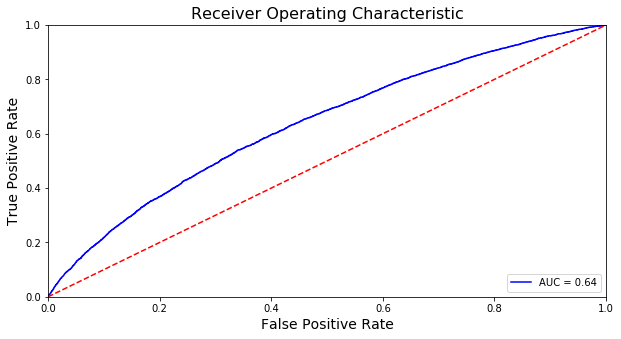

In [78]:
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

In [79]:
roc_auc

0.6362558863152966

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:** Минус встроенного метода в том, что он зависит от нормализации данных. При этом качество его предсказания уступает остальным. С другой стороны, для его реализации особо ничего не требуется: достаточно проанализировать веса. Минус метода-обертки в том, что он занимает слишком много времени: чтобы удалось получить предсказание за приемлемое время, приходится урезать выборку, по которой делается предсказание. С другой стороны, качество получается достаточно высоким, и за счет случайного перемешивания признаков повышается вероятность отобрать действительно самые значимые. Лучшим алгоритмом я бы назвала метод фильтрации. У него получился лучший скор, при этом на его обучение требуется меньше всего времени.

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбор порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборке как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [2]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [3]:
X_train[y_train == 1].shape[0]

17373

In [4]:
X_train[y_train == 0].shape[0]

458796

Как мы видим, положительных примеров значительно меньше, чем отрицательных. Это объясняется постановкой задачи: необходимо, чтобы как можно меньше людей все-таки обратились в страховую компанию за выплатой.

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [5]:
categorical = data.columns[data.columns.str.contains('_cat')]

enc = OneHotEncoder()
X_categor_train = enc.fit_transform(X_train[categorical]).toarray()
X_categor_test = enc.transform(X_test[categorical]).toarray()

encode_X_train = X_train.drop(columns=categorical)
encode_X_test = X_test.drop(columns=categorical)

encode_X_train = np.hstack((encode_X_train.to_numpy(), X_categor_train))
encode_X_test = np.hstack((encode_X_test.to_numpy(), X_categor_test))

print("Count of features: ", encode_X_train.shape[1])

Count of features:  227


В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [6]:
log_regression = LogisticRegression(max_iter=10000)
log_regression.fit(encode_X_train, y_train)
p_pred = log_regression.predict_proba(encode_X_test)

In [49]:
y_score = log_regression.predict(encode_X_test)

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

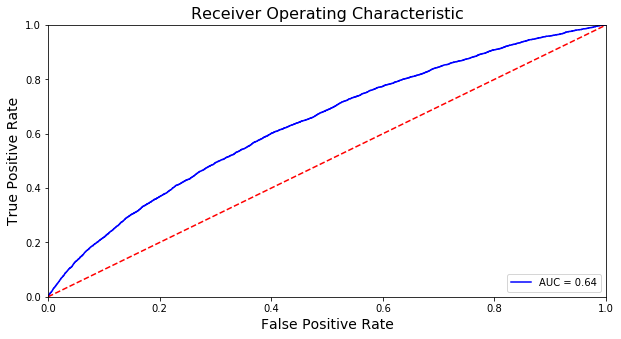

In [7]:
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

In [8]:
roc_auc

0.6380455824423934

AUC ROC оценивает вероятность того, что случайно взятый объект класса 1 имеет оценку принадлежности к классу 1 выше, чем случайно взятый объект класса 0. По нашей кривой можно подумать, что алгоритм справляется достаточно хорошо. Но известно, что AUC-ROC не так хорош в задачах с дисбалансом классов.

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

In [9]:
average_precision = metrics.average_precision_score(y_test, p_pred[:, 1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.06


Text(0.5, 1.0, 'Average precision score: AP=0.06')

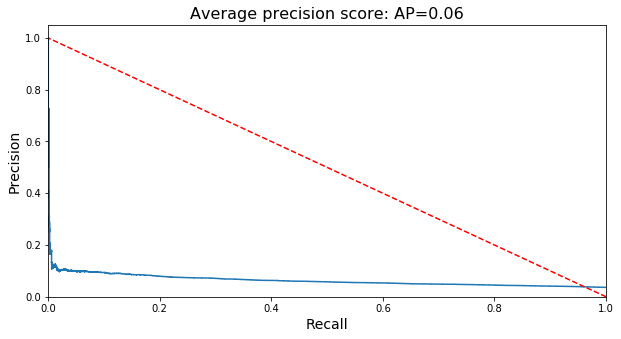

In [10]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, p_pred[:, 1])
plt.figure(figsize=(10, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.plot([1, 0], [0, 1],'r--')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score: AP={0:0.2f}'.format(average_precision), fontsize=16)

Результат удручающий. Значение точности слишком низкое: мы предсказываем, что в страховую обратятся люди, которые на самом деле не будут туда обращаться. Получается, наша модель работает плохо. С помощью PR нам удалось это выявить.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положительных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [37]:
thresh = np.min(threshold[precision[:-1] >= 0.95])

In [39]:
precision[:-1][threshold == thresh]

array([1.])

In [40]:
recall[:-1][threshold == thresh]

array([0.00046286])

Получаем точность 100%, а полноту всего 0.46%. Мы откажем 99.54% потенциальных клиентов!

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(1 балл)__

На каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

In [62]:
y_score = p_pred[:, 1]

result = []
max_score = 0
max_thresh = 0

for thresh in threshold:
    score = 100000 * np.sum((y_score > thresh) * (y_test == 1)) - 5000 * np.sum((y_score > thresh) * (y_test == 0))
    if score >= 0:
        result.append(thresh)
    if score > max_score:
        max_score = score
        max_thresh = thresh

Порог, при котором баланс неотрицательный:

In [63]:
np.min(result)

0.029322274035141743

А на каком значение порога это разница максимальна? Скольким клиентам мы отказали в обслуживании?

In [67]:
print(max_thresh, max_score)

0.04924584230939978 46250000


При таком пороге мы заработаем 46250000. Посмотрим, какое у нас получилось recall:

In [68]:
recall[:-1][threshold == max_thresh]

array([0.33302476])

Т.е. мы отказали 67% клиентов.

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

In [1]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ